In [1]:
%matplotlib inline
import os
import logging
import sys
import numpy as np
import matplotlib.pyplot as plt

import nems
import nems0.initializers
import nems0.priors
import nems0.utils
import nems0.xforms as xforms
import nems0.db as nd
import nems0.recording as recording
from nems0.xform_helper import fit_model_xform

log = logging.getLogger(__name__)

[nems0.configs.defaults INFO] Saving log messages to /tmp/nems/NEMS 2020-07-08 203415.log


### Set basic parameters, file locations ###

In [2]:
# Choose which site to analyze
cellid, rec_file = "TAR010c", "TAR010c_1f7a5c24acefc711c80e42b4d08059ecac4eeab3.tgz"
#cellid, rec_file = "AMT018a", "AMT018a_2ea7a1f3a80e490e8470d7a03510814b6ebd4cbb.tgz"
#cellid, rec_file = "AMT020a", "AMT020a_fde38a46fbfd855091c80b6ecd0f52cc8f8f837e.tgz"
#cellid, rec_file = "AMT022c", "AMT022c_7fef97c8b0bf0838cd9cb83f37b456faf1904243.tgz"
#cellid, rec_file = "AMT026a", "AMT026a_1c008a72f4e36be964f27c7d031a01fe08228f32.tgz"
#cellid, rec_file = "bbl102d", "bbl102d_95a230b1de41cc30a2cf4424d1cb920ee7f1d31e.tgz"
#cellid, rec_file = "BRT026c", "BRT026c_9edaef6ed1394537f123e5952b0e1c8ad1d18810.tgz"
#cellid, rec_file = "BRT033b", "BRT033b_c03ee082c3ab76ead50377ffd4cf68fd3a3aa487.tgz"
#cellid, rec_file = "BRT036b", "BRT036b_1d3bdc2d6c4f81701ef01f743e20b37a4c78150f.tgz"
#cellid, rec_file = "BRT037b", "BRT037b_027ba5897426c9040f09cc3e9bdbbb7968eef1ac.tgz"
#cellid, rec_file = "BRT039c", "BRT039c_6f37b1f7894408b90895028a77274dd9e8aa028e.tgz"

In [3]:
in_lab = (nems0.get_setting('SQL_ENGINE')=='mysql')
in_lab = False

# figure out data and results paths:
results_dir = nems0.get_setting('NEMS_RESULTS_DIR')
recordings_dir = os.path.join(nems0.get_setting('NEMS_RECORDINGS_DIR'), "307")

batch = 307

if in_lab:
    from nems_lbhb.xform_wrappers import generate_recording_uri
    recording_uri = generate_recording_uri(cellid=cellid, batch=307, loadkey=loadkey)
else:
    recording_uri = os.path.join(recordings_dir, rec_file)

load_command = 'nems0.demo.loaders.demo_loader'

print("Recording URI:", recording_uri)

Recording URI: /auto/data/nems_db/recordings/307/TAR010c_1f7a5c24acefc711c80e42b4d08059ecac4eeab3.tgz


Specify modelname and modelname2 (control), including number of channels and pc index

In [4]:
c1=3
pcidx=4
#  state gain per intermediate channel
modelname = f"ld-norm-st.pup.beh-ref-pca.n{pcidx}_wc.15x{c1}.g-fir.1x8x{c1}-stategain.Sx{c1}.g-wc.{c1}xR-lvl.R-dexp.R_jk.nf8.o-tfinit.n.lr1e3.et3-newtf.n.lr1e4"

#  control, no behavior -- but note that pupil IS preserved.
modelname2 = f"ld-norm-st.pup.beh0-ref-pca.n{pcidx}_wc.15x{c1}.g-fir.1x8x{c1}-stategain.Sx{c1}.g-wc.{c1}xR-lvl.R-dexp.R_jk.nf8.o-tfinit.n.lr1e3.et3-newtf.n.lr1e4"

#  control, single state gain per output channel
#modelname2 = f"ld-norm-st.pup.beh-ref-pca.n{pcidx}_wc.15x{c1}.g-fir.1x8x{c1}-wc.{c1}xR-stategain.SxR.g-lvl.R-dexp.R_jk.nf8.o-tfinit.n.lr1e3.et3-newtf.n.lr1e4"

Fit behavior-dependent model

[nems0.xform_helper INFO] Initializing modelspec(s) for cell/batch TAR010c/307...
[nems0.xform_helper INFO] TODO: simplify generate_xforms_spec parameters
[nems0.xform_helper INFO] Initializing modelspec(s) for recording/model /auto/data/nems_db/recordings/307/TAR010c_1f7a5c24acefc711c80e42b4d08059ecac4eeab3.tgz/ld-norm-st.pup.beh-ref-pca.n4_wc.15x3.g-fir.1x8x3-stategain.Sx3.g-wc.3xR-lvl.R-dexp.R_jk.nf8.o-tfinit.n.lr1e3.et3-newtf.n.lr1e4...
[nems0.plugins.default_initializers INFO] Setting up N-fold fitting...
[nems0.xforms INFO] Evaluating: nems0.xforms.init_context
[nems0.xforms INFO] xf argument recording_uri_list overlaps with existing context key: nems0.xforms.load_recordings
[nems0.xforms INFO] Evaluating: nems0.xforms.load_recordings
[nems0.xforms INFO] Extracting cellid(s) TAR010c
[nems0.preprocessing INFO] Adding to epoch_onsets: TRIAL with shift = 0
[nems0.xforms INFO] Evaluating: nems0.xforms.normalize_sig
[nems0.xforms INFO] Evaluating: nems0.xforms.normalize_sig
[nems0.xfo

Epoch 00001/10000 - loss: 1.0353 - pearson: -8.3846e-02
Epoch 00010/10000 - loss: 1.0221 - pearson: -4.7631e-02
Epoch 00020/10000 - loss: 1.0132 - pearson: -4.5623e-02
Epoch 00030/10000 - loss: 1.0094 - pearson: -3.8446e-02
Epoch 00040/10000 - loss: 1.0066 - pearson: -3.2727e-02
Epoch 00050/10000 - loss: 1.0037 - pearson: -2.1619e-02
Epoch 00060/10000 - loss: 1.0014 - pearson: -4.3368e-03
Epoch 00070/10000 - loss: 0.9988 - pearson: 0.0372
Epoch 00080/10000 - loss: 0.9963 - pearson: 0.0878
Epoch 00090/10000 - loss: 0.9936 - pearson: 0.1137
Epoch 00100/10000 - loss: 0.9907 - pearson: 0.1223
Epoch 00110/10000 - loss: 0.9882 - pearson: 0.1245
Epoch 00120/10000 - loss: 0.9856 - pearson: 0.1290
Epoch 00130/10000 - loss: 0.9838 - pearson: 0.1317
Epoch 00140/10000 - loss: 0.9817 - pearson: 0.1351
Epoch 00150/10000 - loss: 0.9810 - pearson: 0.1358
Epoch 00160/10000 - loss: 0.9801 - pearson: 0.1378
Epoch 00170/10000 - loss: 0.9791 - pearson: 0.1401
Epoch 00180/10000 - loss: 0.9792 - pearson: 0.1

[nems0.tf.cnnlink_new INFO] Populating modelspec with model weights.
[nems0.tf.layers INFO] Converted weight_channels_gaussian to modelspec phis.
[nems0.tf.layers INFO] Converted fir to modelspec phis.
[nems0.tf.layers INFO] Converted weight_channels_basic to modelspec phis.
[nems0.tf.layers INFO] Converted levelshift to modelspec phis.


Epoch 00488: early stopping


[nems0.tf.cnnlink_new INFO] Mean difference between NEMS and TF model prediction: 9.351937025440686e-08
[nems0.tf.cnnlink_new INFO] Initializing static nl "nems0.modules.nonlinearity.double_exponential" at layer #5
[nems0.initializers INFO] Init dexp: {'amplitude': array([[17.50458043]]), 'base': array([[-3.92617836]]), 'kappa': array([[1.11733849]]), 'shift': array([[-0.16432555]])}
[nems0.tf.cnnlink_new INFO] Running second init fit: all frozen but static nl.
[nems0.tf.cnnlink_new INFO] Building tensorflow keras model from modelspec.
[nems0.tf.cnnlink_new INFO] Feature dimensions: (314, 58, 15); Data dimensions: (314, 58, 1).
[nems0.tf.cnnlink_new INFO] State dimensions: (314, 58, 3)
[nems0.tf.layers INFO] Building tf layer for "nems0.modules.weight_channels.gaussian".
[nems0.tf.layers INFO] Building tf layer for "nems0.modules.fir.filter_bank".
[nems0.tf.layers INFO] Building tf layer for "nems0.modules.state.state_gain".
[nems0.tf.layers INFO] Building tf layer for "nems0.modules.w

Epoch 00001/10000 - loss: 3.4694 - pearson: 0.1122
Epoch 00010/10000 - loss: 1.7679 - pearson: 0.1145
Epoch 00020/10000 - loss: 1.4246 - pearson: 0.1193
Epoch 00030/10000 - loss: 1.2245 - pearson: 0.1230
Epoch 00040/10000 - loss: 1.1138 - pearson: 0.1296
Epoch 00050/10000 - loss: 1.0558 - pearson: 0.1310
Epoch 00060/10000 - loss: 1.0215 - pearson: 0.1418
Epoch 00070/10000 - loss: 1.0046 - pearson: 0.1470
Epoch 00080/10000 - loss: 0.9920 - pearson: 0.1514
Epoch 00090/10000 - loss: 0.9857 - pearson: 0.1604
Epoch 00100/10000 - loss: 0.9805 - pearson: 0.1666
Epoch 00110/10000 - loss: 0.9780 - pearson: 0.1677
Epoch 00120/10000 - loss: 0.9737 - pearson: 0.1731
Epoch 00130/10000 - loss: 0.9714 - pearson: 0.1766
Epoch 00140/10000 - loss: 0.9690 - pearson: 0.1791
Epoch 00150/10000 - loss: 0.9659 - pearson: 0.1851
Epoch 00160/10000 - loss: 0.9641 - pearson: 0.1883
Epoch 00170/10000 - loss: 0.9628 - pearson: 0.1893
Epoch 00180/10000 - loss: 0.9618 - pearson: 0.1968
Epoch 00190/10000 - loss: 0.962

[nems0.tf.cnnlink_new INFO] Populating modelspec with model weights.
[nems0.tf.layers INFO] Converted weight_channels_gaussian_1 to modelspec phis.
[nems0.tf.cnnlink_new WARNING] Frozen layer weights changed:
[0.09753715 0.3745889  0.3851389 ]
[0.14305249 0.3972178  0.58945596]
[nems0.tf.cnnlink_new WARNING] Model layer "nems0.modules.weight_channels.gaussian" weights changed significantly despite being frozen!
[nems0.tf.layers INFO] Converted fir_1 to modelspec phis.
[nems0.tf.cnnlink_new WARNING] Frozen layer weights changed:
[[-0.26459154 -0.65918607  1.0081192   0.20592831  0.0806687   0.09936313
   0.00332275 -0.27335173]
 [-0.4563442  -0.66548103  0.95188797  0.21769853  0.03496409  0.08168313
  -0.01524058 -0.1389837 ]
 [-0.4324854  -0.66900563  0.95133305  0.21561255  0.03902923  0.08632708
  -0.0097826  -0.154224  ]]
[[ 0.08603515 -0.45250997  1.0419862   0.01000078 -0.01083141  0.04747577
   0.06771764 -0.14903542]
 [-0.4887897  -0.7794968   0.70707226  0.16319552  0.05397692

Epoch 00766: early stopping


[nems0.tf.cnnlink_new INFO] Mean difference between NEMS and TF model prediction: 2.9079773202723223e-07
[nems0.xforms INFO] Evaluating: nems0.xforms.fit_wrapper
[nems0.xforms INFO] ----------------------------------------------------
[nems0.xforms INFO] Fitting: nems0.tf.cnnlink_new.fit_tf, fit 1/1, fold 1/1
[nems0.tf.cnnlink_new INFO] Building tensorflow keras model from modelspec.
[nems0.tf.cnnlink_new INFO] Feature dimensions: (314, 58, 15); Data dimensions: (314, 58, 1).
[nems0.tf.cnnlink_new INFO] State dimensions: (314, 58, 3)
[nems0.tf.layers INFO] Building tf layer for "nems0.modules.weight_channels.gaussian".
[nems0.tf.layers INFO] Building tf layer for "nems0.modules.fir.filter_bank".
[nems0.tf.layers INFO] Building tf layer for "nems0.modules.state.state_gain".
[nems0.tf.layers INFO] Building tf layer for "nems0.modules.weight_channels.basic".
[nems0.tf.layers INFO] Building tf layer for "nems0.modules.levelshift.levelshift".
[nems0.tf.layers INFO] Building tf layer for "ne

Epoch 00001/10000 - loss: 0.9522 - pearson: 0.2146
Epoch 00010/10000 - loss: 0.9509 - pearson: 0.2186
Epoch 00020/10000 - loss: 0.9533 - pearson: 0.2122
Epoch 00030/10000 - loss: 0.9535 - pearson: 0.2118
Epoch 00040/10000 - loss: 0.9519 - pearson: 0.2137
Epoch 00050/10000 - loss: 0.9515 - pearson: 0.2178
Epoch 00060/10000 - loss: 0.9505 - pearson: 0.2193
Epoch 00070/10000 - loss: 0.9513 - pearson: 0.2170
Epoch 00080/10000 - loss: 0.9513 - pearson: 0.2137
Epoch 00090/10000 - loss: 0.9521 - pearson: 0.2140
Epoch 00100/10000 - loss: 0.9503 - pearson: 0.2178
Epoch 00110/10000 - loss: 0.9529 - pearson: 0.2128
Epoch 00120/10000 - loss: 0.9518 - pearson: 0.2139
Epoch 00130/10000 - loss: 0.9517 - pearson: 0.2129
Epoch 00140/10000 - loss: 0.9518 - pearson: 0.2138
Epoch 00150/10000 - loss: 0.9511 - pearson: 0.2158
Epoch 00160/10000 - loss: 0.9508 - pearson: 0.2162
Epoch 00170/10000 - loss: 0.9505 - pearson: 0.2163
Epoch 00180/10000 - loss: 0.9502 - pearson: 0.2198
Epoch 00190/10000 - loss: 0.953

[nems0.tf.cnnlink_new INFO] Populating modelspec with model weights.
[nems0.tf.layers INFO] Converted weight_channels_gaussian_2 to modelspec phis.
[nems0.tf.layers INFO] Converted fir_2 to modelspec phis.
[nems0.tf.layers INFO] Converted state_dc_gain_1 to modelspec phis.
[nems0.tf.layers INFO] Converted weight_channels_basic_2 to modelspec phis.
[nems0.tf.layers INFO] Converted levelshift_2 to modelspec phis.
[nems0.tf.layers INFO] Converted double_exponential_1 to modelspec phis.


Epoch 00259: early stopping


[nems0.tf.cnnlink_new INFO] Mean difference between NEMS and TF model prediction: 3.128357025117442e-07
[nems0.xforms INFO] Evaluating: nems0.xforms.predict
[nems0.xforms INFO] Evaluating: nems0.xforms.add_summary_statistics
/auto/users/svd/python/nems/nems/metrics/loglike.py:22: RuntimeWarning: invalid value encountered in log
  denom = np.mean(x2) * np.log(np.mean(x2))
[nems0.xforms INFO] Skipping jackknife MI calculations
[nems0.metrics.state INFO] state_mod_index for pred, state_raw, baseline
[nems0.metrics.state INFO] state_mod_index for pred, state_raw, pupil
[nems0.metrics.state INFO] state_mod_index for pred, state_raw, active
[nems0.metrics.state INFO] state_mod_index for resp, state_raw, baseline
[nems0.metrics.state INFO] state_mod_index for resp, state_raw, pupil
[nems0.metrics.state INFO] state_mod_index for resp, state_raw, active
[nems0.xforms INFO] Evaluating: nems0.xforms.plot_summary
[nems0.modelspec INFO] Quickplot: no epoch specified, falling back to "TRIAL"
[nems0.

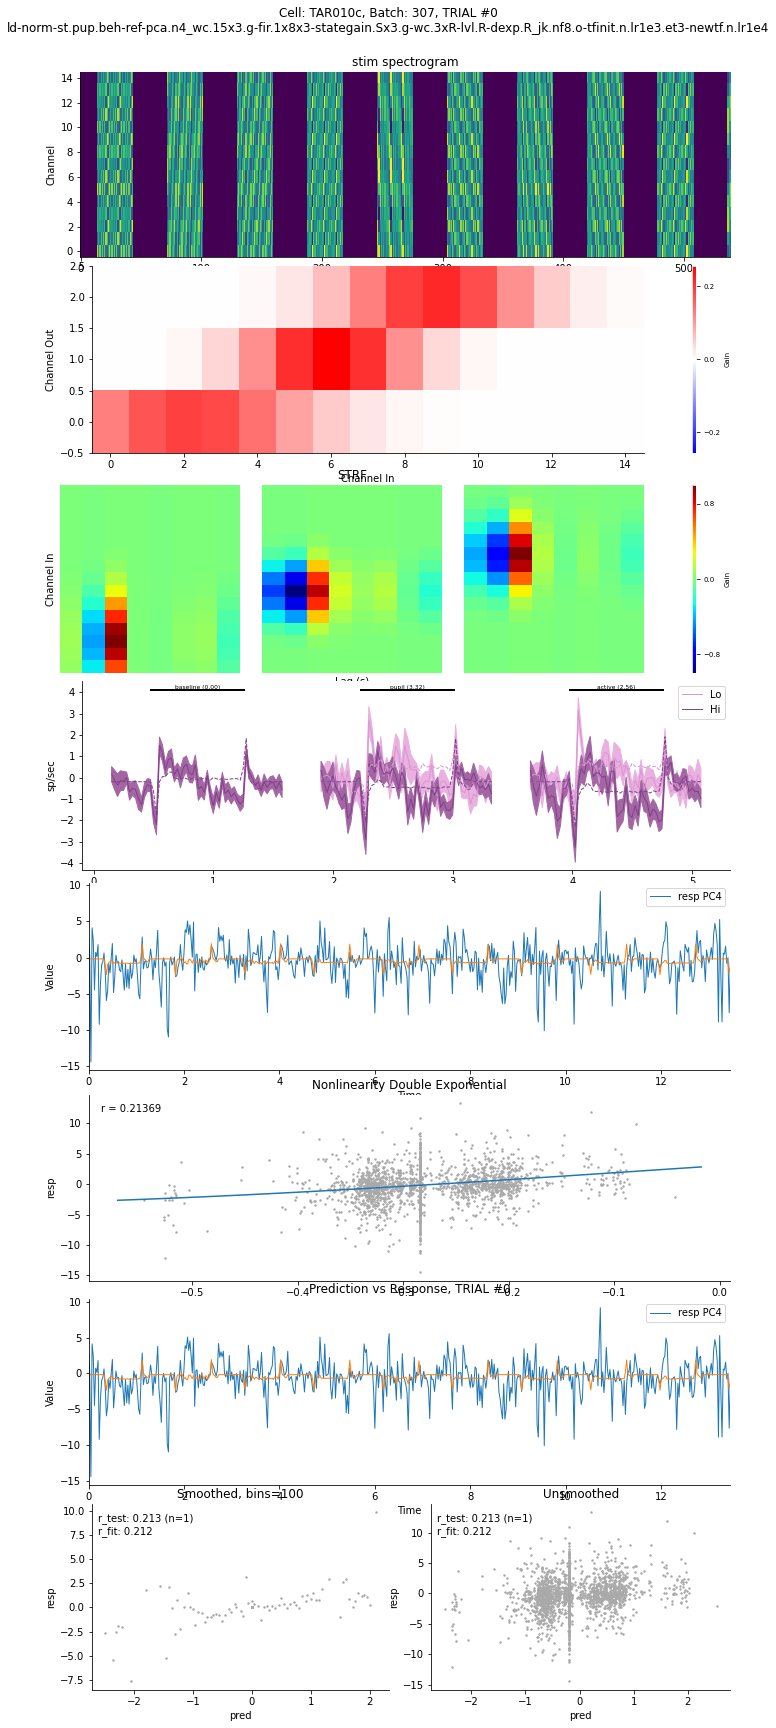

In [5]:
xfspec, ctx = fit_model_xform(cellid, batch, modelname, returnModel=True, recording_uri=recording_uri)

Fit control

[nems0.xform_helper INFO] Initializing modelspec(s) for cell/batch TAR010c/307...
[nems0.xform_helper INFO] TODO: simplify generate_xforms_spec parameters
[nems0.xform_helper INFO] Initializing modelspec(s) for recording/model /auto/data/nems_db/recordings/307/TAR010c_1f7a5c24acefc711c80e42b4d08059ecac4eeab3.tgz/ld-norm-st.pup.beh0-ref-pca.n4_wc.15x3.g-fir.1x8x3-stategain.Sx3.g-wc.3xR-lvl.R-dexp.R_jk.nf8.o-tfinit.n.lr1e3.et3-newtf.n.lr1e4...
[nems0.plugins.default_initializers INFO] Setting up N-fold fitting...
[nems0.xforms INFO] Evaluating: nems0.xforms.init_context
[nems0.xforms INFO] xf argument recording_uri_list overlaps with existing context key: nems0.xforms.load_recordings
[nems0.xforms INFO] Evaluating: nems0.xforms.load_recordings
[nems0.xforms INFO] Extracting cellid(s) TAR010c
[nems0.preprocessing INFO] Adding to epoch_onsets: TRIAL with shift = 0
[nems0.xforms INFO] Evaluating: nems0.xforms.normalize_sig
[nems0.xforms INFO] Evaluating: nems0.xforms.normalize_sig
[nems0.xf

Epoch 00001/10000 - loss: 1.0353 - pearson: -8.3846e-02
Epoch 00010/10000 - loss: 1.0221 - pearson: -4.7631e-02
Epoch 00020/10000 - loss: 1.0132 - pearson: -4.5623e-02
Epoch 00030/10000 - loss: 1.0094 - pearson: -3.8446e-02
Epoch 00040/10000 - loss: 1.0066 - pearson: -3.2727e-02
Epoch 00050/10000 - loss: 1.0037 - pearson: -2.1619e-02
Epoch 00060/10000 - loss: 1.0014 - pearson: -4.3368e-03
Epoch 00070/10000 - loss: 0.9988 - pearson: 0.0372
Epoch 00080/10000 - loss: 0.9963 - pearson: 0.0878
Epoch 00090/10000 - loss: 0.9936 - pearson: 0.1137
Epoch 00100/10000 - loss: 0.9907 - pearson: 0.1223
Epoch 00110/10000 - loss: 0.9882 - pearson: 0.1245
Epoch 00120/10000 - loss: 0.9856 - pearson: 0.1290
Epoch 00130/10000 - loss: 0.9838 - pearson: 0.1317
Epoch 00140/10000 - loss: 0.9817 - pearson: 0.1351
Epoch 00150/10000 - loss: 0.9810 - pearson: 0.1358
Epoch 00160/10000 - loss: 0.9801 - pearson: 0.1378
Epoch 00170/10000 - loss: 0.9791 - pearson: 0.1401
Epoch 00180/10000 - loss: 0.9792 - pearson: 0.1

[nems0.tf.cnnlink_new INFO] Populating modelspec with model weights.
[nems0.tf.layers INFO] Converted weight_channels_gaussian_3 to modelspec phis.
[nems0.tf.layers INFO] Converted fir_3 to modelspec phis.
[nems0.tf.layers INFO] Converted weight_channels_basic_3 to modelspec phis.
[nems0.tf.layers INFO] Converted levelshift_3 to modelspec phis.


Epoch 00488: early stopping


[nems0.tf.cnnlink_new INFO] Mean difference between NEMS and TF model prediction: 9.063866217036654e-08
[nems0.tf.cnnlink_new INFO] Initializing static nl "nems0.modules.nonlinearity.double_exponential" at layer #5
[nems0.initializers INFO] Init dexp: {'amplitude': array([[17.50458043]]), 'base': array([[-3.92617836]]), 'kappa': array([[1.1173385]]), 'shift': array([[-0.16432558]])}
[nems0.tf.cnnlink_new INFO] Running second init fit: all frozen but static nl.
[nems0.tf.cnnlink_new INFO] Building tensorflow keras model from modelspec.
[nems0.tf.cnnlink_new INFO] Feature dimensions: (314, 58, 15); Data dimensions: (314, 58, 1).
[nems0.tf.cnnlink_new INFO] State dimensions: (314, 58, 3)
[nems0.tf.layers INFO] Building tf layer for "nems0.modules.weight_channels.gaussian".
[nems0.tf.layers INFO] Building tf layer for "nems0.modules.fir.filter_bank".
[nems0.tf.layers INFO] Building tf layer for "nems0.modules.state.state_gain".
[nems0.tf.layers INFO] Building tf layer for "nems0.modules.we

Epoch 00001/10000 - loss: 3.4674 - pearson: 0.1122
Epoch 00010/10000 - loss: 1.7360 - pearson: 0.1168
Epoch 00020/10000 - loss: 1.3764 - pearson: 0.1231
Epoch 00030/10000 - loss: 1.2016 - pearson: 0.1260
Epoch 00040/10000 - loss: 1.1056 - pearson: 0.1348
Epoch 00050/10000 - loss: 1.0490 - pearson: 0.1381
Epoch 00060/10000 - loss: 1.0160 - pearson: 0.1481
Epoch 00070/10000 - loss: 0.9978 - pearson: 0.1526
Epoch 00080/10000 - loss: 0.9892 - pearson: 0.1537
Epoch 00090/10000 - loss: 0.9836 - pearson: 0.1583
Epoch 00100/10000 - loss: 0.9801 - pearson: 0.1627
Epoch 00110/10000 - loss: 0.9777 - pearson: 0.1635
Epoch 00120/10000 - loss: 0.9748 - pearson: 0.1653
Epoch 00130/10000 - loss: 0.9737 - pearson: 0.1657
Epoch 00140/10000 - loss: 0.9725 - pearson: 0.1688
Epoch 00150/10000 - loss: 0.9700 - pearson: 0.1739
Epoch 00160/10000 - loss: 0.9688 - pearson: 0.1750
Epoch 00170/10000 - loss: 0.9667 - pearson: 0.1779
Epoch 00180/10000 - loss: 0.9670 - pearson: 0.1808
Epoch 00190/10000 - loss: 0.967

[nems0.tf.cnnlink_new INFO] Populating modelspec with model weights.
[nems0.tf.layers INFO] Converted weight_channels_gaussian_4 to modelspec phis.
[nems0.tf.cnnlink_new WARNING] Frozen layer weights changed:
[0.09753717 0.37458923 0.38513854]
[0.24593054 0.3939577  0.46683595]
[nems0.tf.cnnlink_new WARNING] Model layer "nems0.modules.weight_channels.gaussian" weights changed significantly despite being frozen!
[nems0.tf.layers INFO] Converted fir_4 to modelspec phis.
[nems0.tf.cnnlink_new WARNING] Frozen layer weights changed:
[[-0.26459128 -0.6591861   1.0081192   0.20592824  0.08066871  0.09936316
   0.00332274 -0.27335173]
 [-0.456344   -0.6654812   0.9518881   0.21769848  0.03496419  0.08168323
  -0.01524044 -0.138984  ]
 [-0.43248585 -0.66900545  0.951333    0.21561259  0.03902914  0.0863269
  -0.0097827  -0.15422362]]
[[-0.11641181 -0.5751435   0.9637104   0.08466351  0.01776442  0.07940953
   0.01918603 -0.19801019]
 [-0.4904136  -0.7554112   0.75804126  0.12669627 -0.00173393 

Epoch 00476: early stopping


[nems0.tf.layers INFO] Converted double_exponential_2 to modelspec phis.
[nems0.tf.cnnlink_new INFO] Mean difference between NEMS and TF model prediction: 2.8473674403754435e-07
[nems0.xforms INFO] Evaluating: nems0.xforms.fit_wrapper
[nems0.xforms INFO] ----------------------------------------------------
[nems0.xforms INFO] Fitting: nems0.tf.cnnlink_new.fit_tf, fit 1/1, fold 1/1
[nems0.tf.cnnlink_new INFO] Building tensorflow keras model from modelspec.
[nems0.tf.cnnlink_new INFO] Feature dimensions: (314, 58, 15); Data dimensions: (314, 58, 1).
[nems0.tf.cnnlink_new INFO] State dimensions: (314, 58, 3)
[nems0.tf.layers INFO] Building tf layer for "nems0.modules.weight_channels.gaussian".
[nems0.tf.layers INFO] Building tf layer for "nems0.modules.fir.filter_bank".
[nems0.tf.layers INFO] Building tf layer for "nems0.modules.state.state_gain".
[nems0.tf.layers INFO] Building tf layer for "nems0.modules.weight_channels.basic".
[nems0.tf.layers INFO] Building tf layer for "nems0.modules

Epoch 00001/10000 - loss: 0.9611 - pearson: 0.1941
Epoch 00010/10000 - loss: 0.9601 - pearson: 0.1973
Epoch 00020/10000 - loss: 0.9618 - pearson: 0.1919
Epoch 00030/10000 - loss: 0.9616 - pearson: 0.1908
Epoch 00040/10000 - loss: 0.9594 - pearson: 0.1964
Epoch 00050/10000 - loss: 0.9605 - pearson: 0.1955
Epoch 00060/10000 - loss: 0.9584 - pearson: 0.2018
Epoch 00070/10000 - loss: 0.9594 - pearson: 0.1983
Epoch 00080/10000 - loss: 0.9593 - pearson: 0.1957
Epoch 00090/10000 - loss: 0.9595 - pearson: 0.1960
Epoch 00100/10000 - loss: 0.9590 - pearson: 0.1983
Epoch 00110/10000 - loss: 0.9602 - pearson: 0.1943
Epoch 00120/10000 - loss: 0.9599 - pearson: 0.1945
Epoch 00130/10000 - loss: 0.9604 - pearson: 0.1918
Epoch 00140/10000 - loss: 0.9604 - pearson: 0.1936
Epoch 00150/10000 - loss: 0.9592 - pearson: 0.1973
Epoch 00160/10000 - loss: 0.9595 - pearson: 0.1951
Epoch 00170/10000 - loss: 0.9585 - pearson: 0.1973
Epoch 00180/10000 - loss: 0.9597 - pearson: 0.1984
Epoch 00190/10000 - loss: 0.961

[nems0.tf.cnnlink_new INFO] Populating modelspec with model weights.
[nems0.tf.layers INFO] Converted weight_channels_gaussian_5 to modelspec phis.
[nems0.tf.layers INFO] Converted fir_5 to modelspec phis.
[nems0.tf.layers INFO] Converted state_dc_gain_3 to modelspec phis.
[nems0.tf.layers INFO] Converted weight_channels_basic_5 to modelspec phis.
[nems0.tf.layers INFO] Converted levelshift_5 to modelspec phis.
[nems0.tf.layers INFO] Converted double_exponential_3 to modelspec phis.


Epoch 00355: early stopping


[nems0.tf.cnnlink_new INFO] Mean difference between NEMS and TF model prediction: 2.9663216965065435e-07
[nems0.xforms INFO] Evaluating: nems0.xforms.predict
[nems0.xforms INFO] Evaluating: nems0.xforms.add_summary_statistics
/auto/users/svd/python/nems/nems/metrics/loglike.py:22: RuntimeWarning: invalid value encountered in log
  denom = np.mean(x2) * np.log(np.mean(x2))
[nems0.xforms INFO] Skipping jackknife MI calculations
[nems0.metrics.state INFO] state_mod_index for pred, state_raw, baseline
[nems0.metrics.state INFO] state_mod_index for pred, state_raw, pupil
[nems0.metrics.state INFO] state_mod_index for pred, state_raw, active
[nems0.metrics.state INFO] state_mod_index for resp, state_raw, baseline
[nems0.metrics.state INFO] state_mod_index for resp, state_raw, pupil
[nems0.metrics.state INFO] state_mod_index for resp, state_raw, active
[nems0.xforms INFO] Evaluating: nems0.xforms.plot_summary
[nems0.modelspec INFO] Quickplot: no epoch specified, falling back to "TRIAL"
[nems0

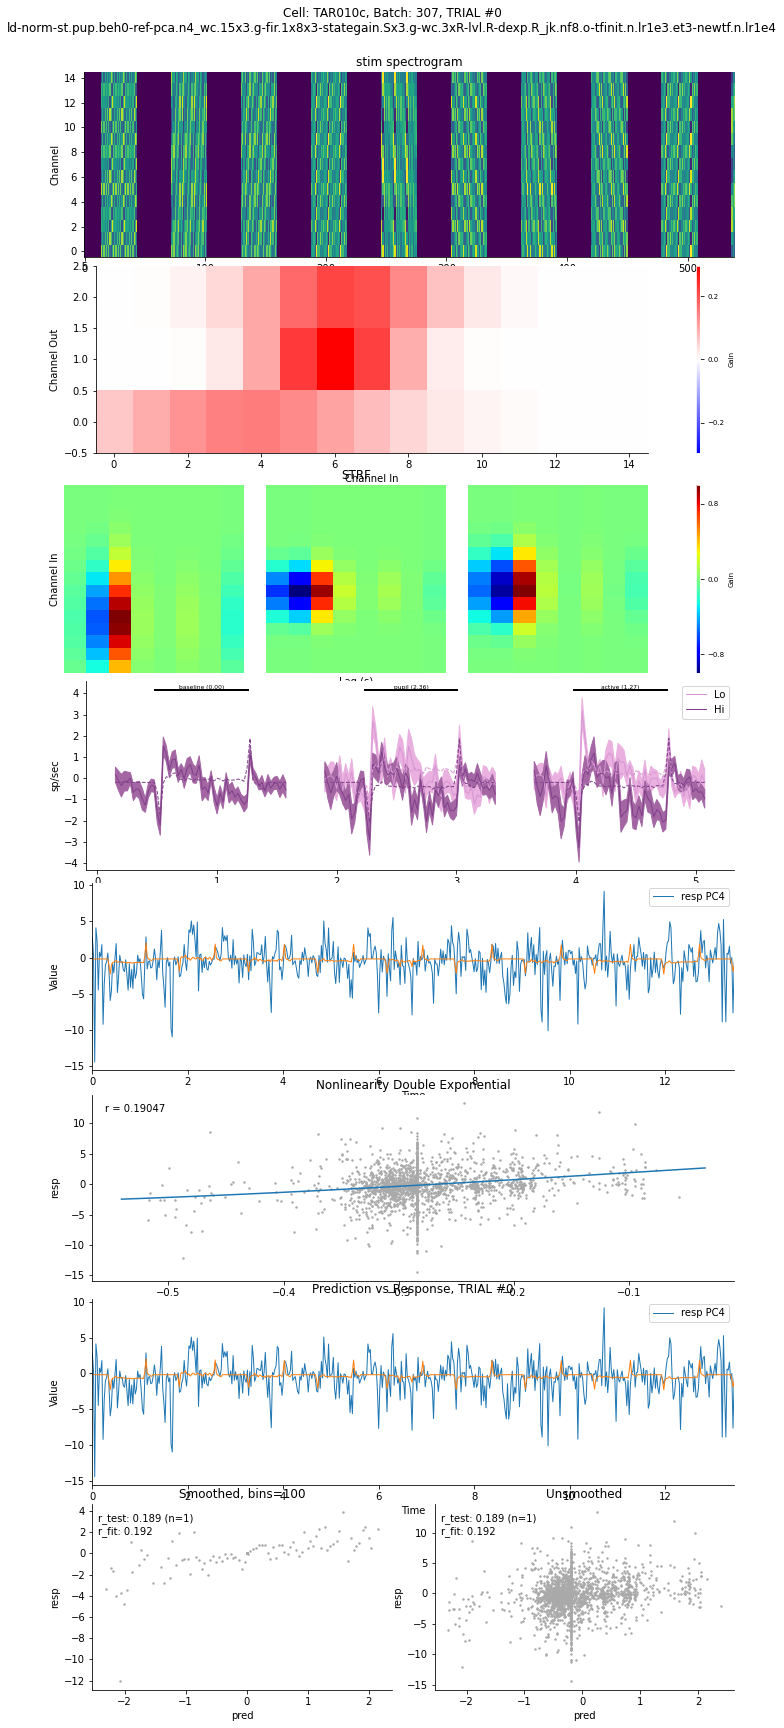

In [6]:
xfspec2, ctx2 = fit_model_xform(cellid, batch, modelname2, returnModel=True, recording_uri=recording_uri)

Plot smoothed error for behavior-dep/control models. Remove pre- and post-stim silent periods to emphasize the differential responses rather than response to any sound at all.

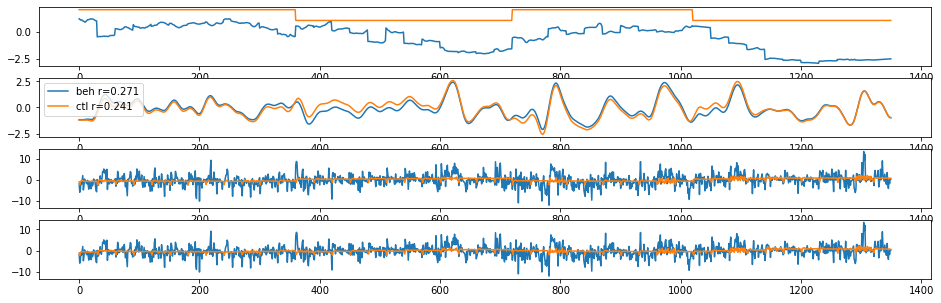

In [7]:
from nems0.utils import smooth

# remove pre- and post-stim silence
rec=ctx['val'].copy()
rec=rec.and_mask(['PreStimSilence','PostStimSilence'], invert=True)
rec=rec.apply_mask()
rec2=ctx2['val'].copy()
rec2=rec2.and_mask(['PreStimSilence','PostStimSilence'], invert=True)
rec2=rec2.apply_mask()

# pick a response channel
i = 0
# extract resp and pred vectors for each model
r1 = rec['resp'].as_continuous()[i,:].T
p1 = rec['pred'].as_continuous()[i,:].T
d1 = r1-p1
w=20
d1s=smooth(d1, window_len=w*2+1)[w:-w]
p2 = rec2['pred'].as_continuous()[i,:].T
d2 = r1-p2
d2s=smooth(d2, window_len=w*2+1)[w:-w]

# pred corr for evoked period only, likely to be lower than r_test for full dataset
predcorr1 = np.corrcoef(p1,r1)[0,1]
predcorr2 = np.corrcoef(p2,r1)[0,1]

f,axs = plt.subplots(4,1,figsize=(16,5))
M=5000  # plot up to M timepoints

#axs[0].imshow(rec['stim'].as_continuous()[1:,:M], aspect='auto')
axs[0].plot((rec['state_raw'].as_continuous()[1:,:M]+np.arange(rec['state_raw'].shape[0]-1)[:,np.newaxis]*1.1).T)
axs[1].plot(d1s)[:M]
axs[1].plot(d2s)[:M]
axs[1].legend((f'beh r={predcorr1:.3f}',f'ctl r={predcorr2:.3f}'))
axs[2].plot(rec['resp'].as_continuous()[i,:M])
axs[2].plot(rec['pred'].as_continuous()[i,:M])
axs[3].plot(rec2['resp'].as_continuous()[i,:M])
axs[3].plot(rec2['pred'].as_continuous()[i,:M])

NB STRF plt now shows the STRF for each intermediate channel separately:

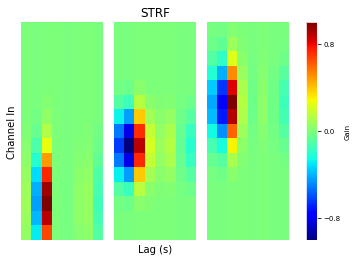

In [8]:
ctx['modelspec'].plot(mod_index=1, plot_fn_idx=2)

Show gain for each state signal (pupil="pup", active="beh") for regular (solid lines) and control models (dashed lines)

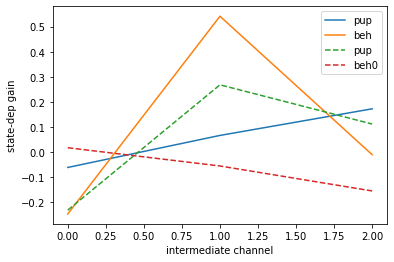

In [9]:
plt.figure()
plt.plot(ctx['modelspec'].phi[2]['g'][:,1:])
plt.plot(ctx2['modelspec'].phi[2]['g'][:,1:],'--')

plt.xlabel('intermediate channel')
plt.ylabel('state-dep gain')
plt.legend(['pup','beh','pup','beh0'])

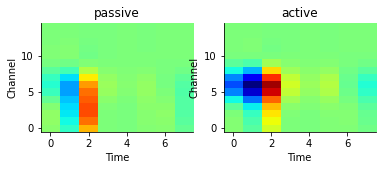

In [10]:
from nems0.plots.heatmap import _get_wc_coefficients, _get_fir_coefficients, plot_heatmap

wc_coefs = _get_wc_coefficients(ctx['modelspec'])
fir_coefs = _get_fir_coefficients(ctx['modelspec'])
final_weights = ctx['modelspec'].phi[3]['coefficients']
pas_gain = ctx['modelspec'].phi[2]['g'][:,0:1].T
act_gain = pas_gain + ctx['modelspec'].phi[2]['g'][:,2:3].T

pas_strf = (wc_coefs.T * pas_gain * final_weights) @ fir_coefs
act_strf = (wc_coefs.T * act_gain * final_weights) @ fir_coefs

lim = np.max([np.max(np.abs(act_strf)), np.max(np.abs(pas_strf))])

f,ax=plt.subplots(1,2, figsize=(6,2))
plot_heatmap(pas_strf, ax=ax[0], title="passive", clim=[-lim, lim], show_cbar=False, cmap='jet')
plot_heatmap(act_strf, ax=ax[1], title="active", clim=[-lim, lim], show_cbar=False, cmap='jet')